In [1]:
import matplotlib.pyplot as plt
import math
import mne
import numpy as np
import pandas as pd
import scipy.io
import scipy.stats as stats
from scipy import signal
from scipy.signal import find_peaks

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### Datos EEG

In [3]:
# Levantamos los datos puros de EEG
mat = scipy.io.loadmat('data/p300-subject-21.mat')


In [4]:
# Creamos la matriz de datos, data points vs canales. 8 canales. Frecuencia de sampleo 250 Hz.
ch_names=['Fz', 'Cz', 'P3', 'Pz', 'P4', 'PO7', 'PO8', 'Oz']
signals = pd.DataFrame(mat['data'][0][0][0], columns = ch_names)

print('Estructura de la informacion:')
signals.head()

Estructura de la informacion:


,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz
0,6.345741,-2.826574,-5.547622,-5.109540,-5.427902,-12.828733,-4.893288,-14.013107
1,4.809175,-3.559781,-5.954600,-5.624037,-5.395182,-13.225392,-4.314703,-13.918633
2,3.342962,-4.131262,-6.127074,-6.003478,-5.354580,-13.390471,-3.828379,-13.966416
3,2.401950,-4.493604,-6.068698,-6.158555,-5.327750,-12.954785,-3.475107,-13.881251
4,2.095043,-4.747584,-6.044509,-6.233059,-5.398479,-11.987429,-3.357387,-13.582345


In [5]:
signals.shape

(355872, 8)

In [6]:
def structure(data):
    for i in data:
        print('Estructura '+ i +': ')

        plt.plot(data[i])
        plt.show()

Estructura Fz: 


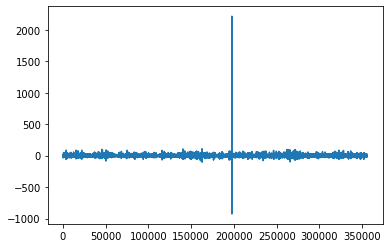

Estructura Cz: 


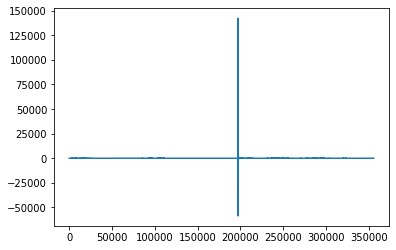

Estructura P3: 


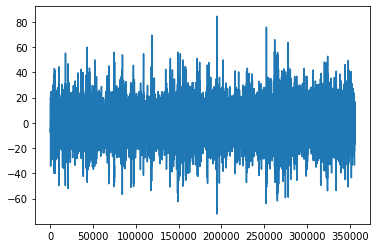

Estructura Pz: 


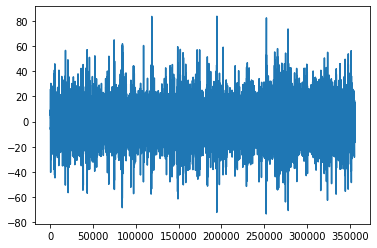

Estructura P4: 


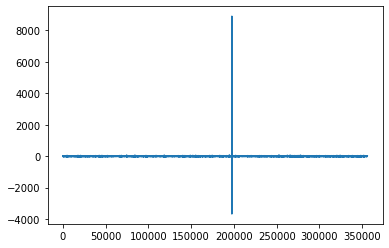

Estructura PO7: 


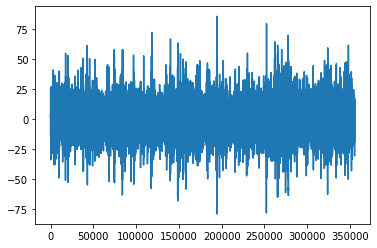

Estructura PO8: 


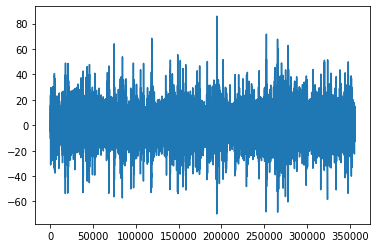

Estructura Oz: 


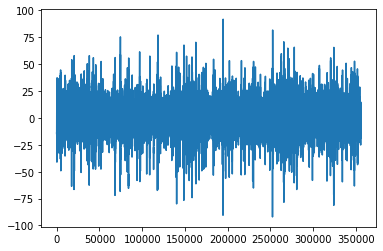

In [7]:
structure(signals)

Eliminado de sección con desconexión de electrodo, mediante inspección ocular

In [8]:
signals = signals[~signals.index.isin(range(194400,198501))]

In [9]:
signals.reset_index(drop = True, inplace = True)

In [10]:
signals.shape

(351771, 8)

Estructura Fz: 


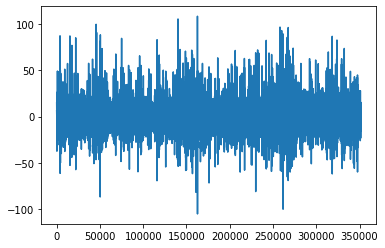

Estructura Cz: 


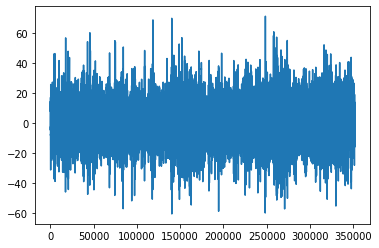

Estructura P3: 


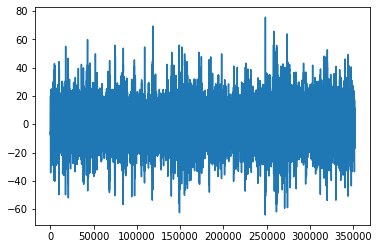

Estructura Pz: 


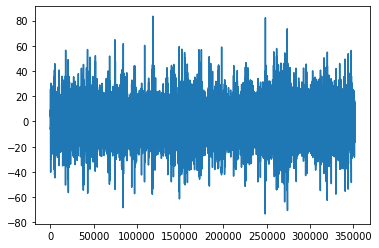

Estructura P4: 


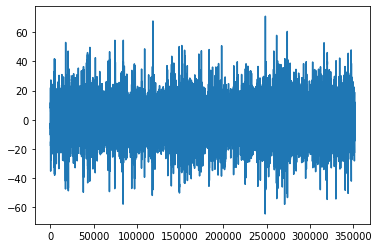

Estructura PO7: 


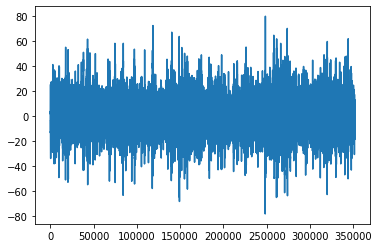

Estructura PO8: 


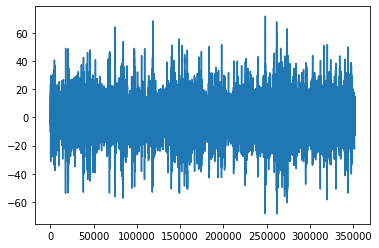

Estructura Oz: 


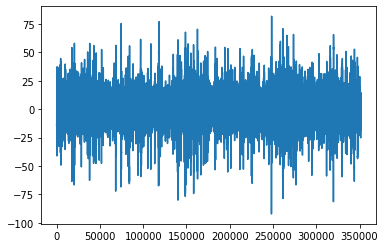

In [11]:
structure(signals)

In [12]:
signals.describe()

,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz
count,351771.000000,351771.000000,351771.000000,351771.000000,351771.000000,351771.000000,351771.000000,351771.000000
mean,0.006328,0.006572,0.006095,0.006739,0.005838,0.006052,0.004967,0.006204
std,13.806649,11.852838,12.004973,13.035020,11.350402,12.506826,11.512757,13.882659
min,-105.094406,-60.734257,-64.004219,-73.338867,-64.609329,-78.310432,-68.378410,-92.118736
25%,-7.228144,-6.876146,-6.935434,-7.480778,-6.536132,-7.073621,-6.339085,-7.080895
50%,-0.044997,-0.028752,0.041022,0.022467,0.025924,0.036255,0.018744,0.041210
75%,7.166354,6.940354,6.961367,7.501636,6.597723,7.138234,6.370493,7.267373
max,108.486580,71.282921,75.664856,83.485741,70.998985,79.600685,71.699059,81.619736


In [13]:
signals.to_csv('data/base_original_cropped.csv', index = False)

### Datos Pestañeos

In [14]:
# Levantamos los datos de pestañeos. Canal único. Frecuencia de sampleo 128 Hz.
blinks = pd.read_csv('/Users/mtobar/python-scientific/data/blinking.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

print('Estructura de la informacion:')
blinks.head()

Estructura de la informacion:


,timestamp,counter,eeg,attention,meditation,blinking
0,1.568384e+09,81,21,0,0,0
1,1.568384e+09,82,20,0,0,0
2,1.568384e+09,83,20,0,0,0
3,1.568384e+09,84,22,0,0,0
4,1.568384e+09,85,22,0,0,0


In [15]:
data = blinks.values
eeg = data[:,2]

Estructura Pestañeos:


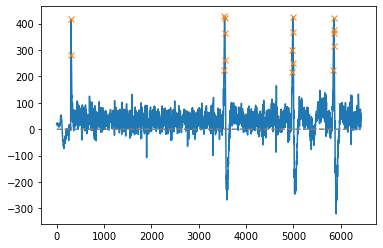

In [16]:
# Análisis de pestañeos

print('Estructura Pestañeos:')
peaks, _ = find_peaks(eeg, height=200)
plt.plot(eeg)
plt.plot(peaks, eeg[peaks], "x")
plt.plot(np.zeros_like(eeg), "--", color="gray")
#plt.savefig('blinks_structure.png')
plt.show()

Pestañeo 1:


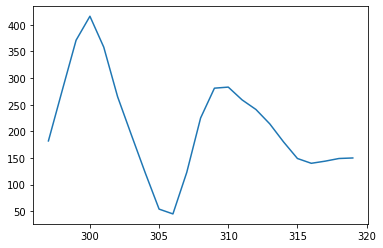

In [17]:
print('Pestañeo 1:')

event_1 = blinks[297:320]
event_1_data = event_1['eeg']
plt.plot(event_1_data)
plt.show()

Pestañeo 2:


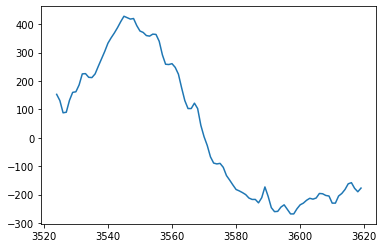

In [18]:
print('Pestañeo 2:')

event_2 = blinks[3524:3620]
event_2_data = event_2['eeg']
plt.plot(event_2_data)
plt.show()

Pestañeo 3:


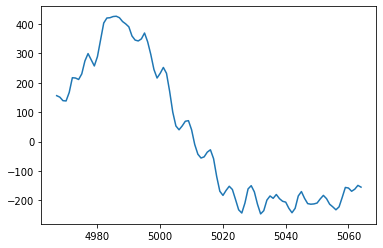

In [19]:
print('Pestañeo 3:')

event_3 = blinks[4967:5065]
event_3_data = event_3['eeg']
plt.plot(event_3_data)
plt.show()

Pestañeo 4:


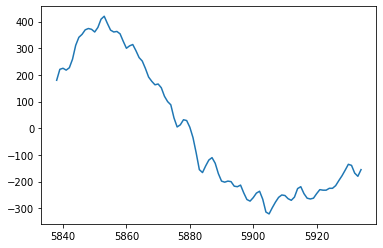

In [20]:
print('Pestañeo 4:')

event_4 = blinks[5838:5935]
event_4_data = event_4['eeg']
plt.plot(event_4_data)
plt.show()

### Ponderación Pestañeos en Canales

El pestañeo afecta con mayor peso a los canales 1 y 2, los más cercanos a los ojos, y en los restantes es más débil. 

In [21]:
def weighs(event):
    full_array = []
    new_array = []
    for i in event:
        for j in [1, 1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]:
            new_array.append(i*j)
        full_array.append(new_array)
        new_array = []
    
    return full_array

In [22]:
full_array_event_1 = weighs(event_1_data)

In [23]:
full_array_event_2 = weighs(event_2_data)

In [24]:
full_array_event_3 = weighs(event_3_data)

In [25]:
full_array_event_4 = weighs(event_4_data)

### Upsample Pestañeos

En el dataset de EEG la frecuencia de sampleo es 250 Hz, en el de pestañeos es 128 Hz. Hacer un Upsample de pestañeos a 250 Hz. 

In [26]:
def resample(event):
    resampled_event = scipy.signal.resample(event, round(len(event)/128*250))
    
    return resampled_event

In [27]:
resampled_event_1 = resample(full_array_event_1)

In [28]:
resampled_event_2 = resample(full_array_event_2)

In [29]:
resampled_event_3 = resample(full_array_event_3)

In [30]:
resampled_event_4 = resample(full_array_event_4)

### Media Zero Pestañeos

Calcular la media de cada pestañeo, en el tiempo por canal y restársela al valor del pestañeo, para que le quede media cero.

In [31]:
def zero_media(event):
    full_array = []
    new_array = []
    for i in event:
        media = i.mean()
        for j in i:
            new_array.append(j - media)
        full_array.append(new_array)
        new_array = []
    
    return full_array

In [32]:
final_event_1 = zero_media(resampled_event_1)

In [33]:
final_event_2 = zero_media(resampled_event_2)

In [34]:
final_event_3 = zero_media(resampled_event_3)

In [35]:
final_event_4 = zero_media(resampled_event_4)

### Vector Inserción Pestañeos

Determina el momento de EEG donde se insertará el pestañeo y lo registra en una variable.

In [36]:
def blink_creator():
    injection = pd.DataFrame(columns=['blink_type'])
    #Itero hasta llegar al tamaño del dataframe signals 351771
    while len(injection) <= len(signals):
        #Inserto al injection una cantidad random de ceros entre 1000 y 1500 (pausa entre pestañeos 4 a 5 segundos)
        pause = pd.DataFrame(np.random.randint(low=0, high=1, size=(np.random.randint(low=1000, high=1250))), columns=['blink_type'])
        injection = injection.append(pause, ignore_index = True)
        #Obtengo un número de pestañeo al azar para isertar.
        blink_number = np.random.randint(low=1, high=5)
        #Inserto al dataset el número del pestañeo (1, 2, 3, 4), tantas veces como len(pestañeo)
        blink = pd.DataFrame(np.random.randint(low=blink_number, high=blink_number+1, size=(len(globals()[(f"final_event_{blink_number}")]))), columns=['blink_type'])
        injection = injection.append(blink, ignore_index = True) 
    
    return (injection[0:len(signals)])


In [37]:
blink_creator = blink_creator()


In [38]:
signals_blink_type = pd.concat([signals, blink_creator], axis=1)

In [39]:
signals_data = signals_blink_type.values

### Inyección Pestañeos en EEG

Suma convexa del valor de la señal original con el pestañeo, multiplicando a cada valor original por uno menos el factor gaussiano y a cada valor del pestañeo por el factor gaussiano.

In [40]:
def blink_injection(EEG_data_with_blinktype):
    new_data = []
    size_blink = -1
    for iteration in range(0, len(EEG_data_with_blinktype)):
        new_array = []
        blink_type = EEG_data_with_blinktype[iteration][-1]
        array = EEG_data_with_blinktype[iteration][0:8]
        if blink_type == 0:
            new_array = list(array)
            size_blink = -1
        else:
            size_blink += 1
            if size_blink >= len(globals()[(f"final_event_{blink_type}")]):
                size_blink = 0
            channel = 0
            for j in array:
                new_array.append(j + globals()[(f"final_event_{blink_type}")][size_blink][channel])
               # new_array.append(j * (1 - globals()[(f"factor_{blink_type}")][size_blink]) + (globals()[(f"factor_{blink_type}")][size_blink] * globals()[(f"final_event_{blink_type}")][size_blink][channel]))
                channel += 1
        new_data.append(new_array)
        new_array = []
        
    return np.array(new_data)

In [41]:
def plain_blinks():
    new_array = []
    size_blink = -1
    for iteration in range(0, len(blink_creator)):
        blink_type = blink_creator.values[iteration][0]
        if blink_type == 0:
            new_array.append(blink_type)
            size_blink = -1
        else:
            size_blink += 1
            if size_blink >= len(globals()[(f"final_event_{blink_type}")]):
                size_blink = 0
            new_array.append(0.001 + globals()[(f"final_event_{blink_type}")][size_blink][0])
            #new_array.append(0.001 * (1 - globals()[(f"factor_{blink_type}")][size_blink]) + (globals()[(f"factor_{blink_type}")][size_blink] * globals()[(f"final_event_{blink_type}")][size_blink][0]))

    return np.array(new_array)

In [42]:
def blink_multiplied(EEG_data_with_blinktype):
    new_data = []
    size_blink = -1
    for iteration in range(0, len(EEG_data_with_blinktype)):
        new_array = []
        blink_type = EEG_data_with_blinktype[iteration][-1]
        array = EEG_data_with_blinktype[iteration][0:8]
        if blink_type == 0:
            new_array = list(array)
            size_blink = -1
        else:
            size_blink += 1
            if size_blink >= len(globals()[(f"final_event_{blink_type}")]):
                size_blink = 0
            channel = 0
            for j in array:
                new_array.append(j + globals()[(f"final_event_{blink_type}")][size_blink][channel] * 1000)
               # new_array.append(j * (1 - globals()[(f"factor_{blink_type}")][size_blink]) + (globals()[(f"factor_{blink_type}")][size_blink] * globals()[(f"final_event_{blink_type}")][size_blink][channel]))
                channel += 1
        new_data.append(new_array)
        new_array = []
        
    return np.array(new_data)

In [43]:
ch_names=['Fz', 'Cz', 'P3', 'Pz', 'P4', 'PO7', 'PO8', 'Oz']
modified_EEG = pd.DataFrame(blink_injection(signals_data), columns = ch_names)
blinks_only = pd.DataFrame(plain_blinks(), columns = ['blinks'])
blinks_multiplied = pd.DataFrame(blink_multiplied(signals_data), columns = ch_names)

In [44]:
from datetime import datetime

modified_EEG.to_csv(datetime.now().strftime('outputs/modified_EEG_%Y%m%d_%H%M.csv'), index = False)
blink_creator.to_csv(datetime.now().strftime('outputs/blinks_%Y%m%d_%H%M.csv'), index = False)
blinks_only.to_csv(datetime.now().strftime('outputs/blinks_only_%Y%m%d_%H%M.csv'), index = False)
blinks_multiplied.to_csv(datetime.now().strftime('outputs/blinks_multiplied_%Y%m%d_%H%M.csv'), index = False)